# LGM VIP | DATA SCIENCE | NOV2021

## AUTHOR = AMAR RAMESH BHADE

## TASK 3 = Stock Market Prediction And Forecasting Using Stacked LSTM

### IMPORTING REQUIRED LIBRARY

In [168]:
import numpy as np

In [169]:
import pandas as pd

In [170]:
from matplotlib import pyplot as plt

In [171]:
import seaborn as sns

In [172]:
import warnings as wr 
wr.filterwarnings("ignore")

### dataset link= https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [173]:
# reading data 

url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset=pd.read_csv(url)

In [174]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [175]:
dataset.shape

(2035, 8)

In [176]:
# now checking null values

dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [177]:
dataset["Date"]

0       2018-09-28
1       2018-09-27
2       2018-09-26
3       2018-09-25
4       2018-09-24
           ...    
2030    2010-07-27
2031    2010-07-26
2032    2010-07-23
2033    2010-07-22
2034    2010-07-21
Name: Date, Length: 2035, dtype: object

In [178]:
# now we sorting date column
data=dataset.sort_values(by=["Date"])

In [179]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [180]:
data.reset_index(inplace=True)

#### statistical discription

In [181]:
data.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2035 non-null   int64  
 1   Date                  2035 non-null   object 
 2   Open                  2035 non-null   float64
 3   High                  2035 non-null   float64
 4   Low                   2035 non-null   float64
 5   Last                  2035 non-null   float64
 6   Close                 2035 non-null   float64
 7   Total Trade Quantity  2035 non-null   int64  
 8   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 143.2+ KB


### data visualization

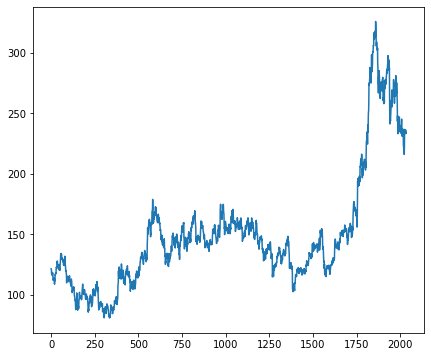

In [183]:
# now we plot graph for Close feature
plt.figure(figsize=(7,6))
plt.plot(data["Close"])

In [184]:
# getting Close column
data_close=data["Close"]

In [185]:
data_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [186]:
# for scaling the attributes

#### import required llibrary

In [187]:
from sklearn.preprocessing import MinMaxScaler 

In [188]:
scaler=MinMaxScaler(feature_range=(0,1))

In [189]:
# now we fit and transforming the training scale data to a range of 0 to 1
scaled_data= scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [190]:
scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [191]:
len(scaled_data)

2035

In [192]:
# the scaling and transformation is completed

In [193]:
# after that we spliting data in train and test
train_size=int(len(scaled_data)*0.70)
test_size=len(scaled_data)-train_size

In [194]:
train, test = scaled_data[0: train_size,:], scaled_data[train_size : len(scaled_data),:1]

In [195]:
train

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.15012255],
       [0.15747549],
       [0.15277778]])

In [196]:
test

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222],
       [0.16401144],
       [0.15727124],
       [0.14705882],
       [0.14460784],
       [0.15175654],
       [0.15441176],
       [0.15216503],
       [0.14848856],
       [0.15522876],
       [0.15767974],
       [0.1621732 ],
       [0.16094771],
       [0.16339869],
       [0.15931373],
       [0.15972222],
       [0.16115196],
       [0.16666667],
       [0.15747549],
       [0.15379902],
       [0.14848856],
       [0.15114379],
       [0.1503268 ],
       [0.15155229],
       [0.15645425],
       [0.16033497],
       [0.1566585 ],
       [0.15686275],
       [0.17749183],
       [0.17973856],
       [0.1744281 ],
       [0.19281046],
       [0.18607026],
       [0.18811275],
       [0.18443627],
       [0.18280229],
       [0.18464052],
       [0.18178105],
       [0.189

In [197]:
# now we convert array into matrix
def matrix (p, q= 1):
    dataX ,dataY =[],[]
    for i in range (len(p)-q-1):
        r=p[i:(i+q),0]
        dataX.append(r)
        dataY.append(p[i+q,0])
    return np.array(dataX),np.array(dataY)
        

In [198]:
q=100
x_train, y_train=matrix(train,q)

In [199]:
x_train.shape

(1323, 100)

In [200]:
y_train.shape

(1323,)

In [201]:
q=100
x_test,y_test=matrix(test,q)

In [202]:
x_test.shape

(510, 100)

In [203]:
y_test.shape

(510,)

In [204]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [205]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

### create the LSTM MODEL 

#### for that import required libraries

In [206]:
import tensorflow as tf

In [207]:
 # import Sequential function for  Training our model
from keras.models import Sequential

In [208]:
seq=Sequential()

In [209]:
# for read the edges minimizing a dimension.
from keras.layers  import Dense

In [210]:
from  keras.layers import LSTM

In [212]:
seq.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
seq.add(LSTM(50,return_sequences=True))
seq.add(LSTM(50))
seq.add(Dense(1))
#now compiling the model using loss function and optimizer.
seq.compile(loss='mean_squared_error',optimizer='adam')
seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [219]:
#fit the xtrain and ytrain data into a model
seq.fit(x_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 4s 235ms/step - loss: 1.5347e-04 - val_loss: 1.2411e-04
Epoch 2/60
19/19 [==============================] - 5s 238ms/step - loss: 1.4328e-04 - val_loss: 1.1759e-04
Epoch 3/60
19/19 [==============================] - 5s 238ms/step - loss: 1.5176e-04 - val_loss: 1.1838e-04
Epoch 4/60
19/19 [==============================] - 5s 237ms/step - loss: 1.4177e-04 - val_loss: 1.3840e-04
Epoch 5/60
19/19 [==============================] - 4s 232ms/step - loss: 1.3255e-04 - val_loss: 1.1612e-04
Epoch 6/60
19/19 [==============================] - 5s 238ms/step - loss: 1.3436e-04 - val_loss: 1.1535e-04
Epoch 7/60
19/19 [==============================] - 5s 242ms/step - loss: 1.3046e-04 - val_loss: 1.1929e-04
Epoch 8/60
19/19 [==============================] - 5s 237ms/step - loss: 1.2950e-04 - val_loss: 1.2759e-04
Epoch 9/60
19/19 [==============================] - 5s 238ms/step - loss: 1.2734e-04 - val_loss: 1.2453e-04
Epoch 10/60
19/19 [=========

In [220]:
prediction= seq.predict(x_test)

In [221]:
# for inverse transform on predictions
inverse_predictions = scaler.inverse_transform(prediction)

In [222]:
inverse_predictions

array([[143.54605 ],
       [143.5694  ],
       [141.0974  ],
       [136.65489 ],
       [138.58421 ],
       [138.71124 ],
       [141.33604 ],
       [141.60828 ],
       [139.56505 ],
       [139.38014 ],
       [140.3392  ],
       [143.82417 ],
       [142.35136 ],
       [145.70178 ],
       [148.23131 ],
       [138.52599 ],
       [140.25653 ],
       [143.80896 ],
       [143.49423 ],
       [154.51053 ],
       [152.80693 ],
       [152.18336 ],
       [152.68338 ],
       [148.89485 ],
       [154.3529  ],
       [151.60544 ],
       [152.98875 ],
       [155.97124 ],
       [153.53453 ],
       [153.57428 ],
       [155.38264 ],
       [151.11629 ],
       [146.35747 ],
       [138.89246 ],
       [141.41684 ],
       [141.41487 ],
       [140.45035 ],
       [136.77615 ],
       [133.12732 ],
       [128.81471 ],
       [129.66808 ],
       [129.60295 ],
       [124.45383 ],
       [126.63686 ],
       [121.53034 ],
       [118.81505 ],
       [122.28842 ],
       [121.1

In [225]:
# we pedicted the value
# for that we import libarary
from sklearn.metrics import mean_squared_error

In [226]:
# for checking the mean squared error for our model 

mean_sqr_error = mean_squared_error(y_test, prediction)
print("The Mean Squared Error is: ", mean_sqr_error)

The Mean Squared Error is:  0.0009254923890537197
